# Ciencia de Datos enfocada en Información Geográfica
## Proyecto


## Karina Lizette Gamboa Puente & Oscar Arturo Bringas Lopez


#### En este proyecto se mostrará la manera de implementar una análisis de muestreo y de mercado aplicado a la cadenas Coppel y Elecktra. 

#### Se geolocalizarán cada una de las tiendas y se hará una comparación del número de Unidades Economicas por Entidad.



In [296]:
import pandas as pd
import numpy as np

#### Se cargan los archivos que  contienen la información de ambas empresas. 

In [297]:
copel=pd.read_csv('C:/Users/Usuario/Documents/Cursos/Python/data/data/Coppel.csv')
elektra=pd.read_csv('C:/Users/Usuario/Documents/Cursos/Python/data/data/Elektra.csv')

#### Primero se trabajará con Coppel

In [298]:
copel.head(5)

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,1,6391609,COBRANZA COPPEL RINCÓN DE ROMOS,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,ALVARO OBREGÓN,AVENIDA,...,Rincón de Romos,0063,15,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,22.230515,-102.320959,DICIEMBRE 2014
1,2,6701632,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,ALDAMA,AVENIDA,...,Jesús María,0020,44,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.960361,-102.344098,ENERO 2016
2,3,6281076,COPPEL 5 DE MAYO 55,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,5 DE MAYO,CALLE,...,Aguascalientes,0500,23,4.499181e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.886399,-102.297193,JULIO 2010
3,4,6773776,COPPEL ALDAMA 1135,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,CALLE,ALDAMA,AVENIDA,...,Jesús María,0020,44,1.449414e+10,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM.MX,Fijo,21.960365,-102.344097,OCTUBRE 2016
4,5,6282087,COPPEL ASUNCIÓN 397,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,AVENIDA,SIGLO XXI,CALLE,...,Aguascalientes,3098,12,4.491391e+09,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,21.926912,-102.266211,JULIO 2010


In [149]:
copel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 42 columns):
Unnamed: 0    1308 non-null int64
id            1308 non-null int64
nom_estab     1308 non-null object
raz_social    1308 non-null object
codigo_act    1308 non-null int64
nombre_act    1308 non-null object
per_ocu       1308 non-null object
tipo_vial     1307 non-null object
nom_vial      1308 non-null object
tipo_v_e_1    1305 non-null object
nom_v_e_1     1304 non-null object
tipo_v_e_2    1305 non-null object
nom_v_e_2     1304 non-null object
tipo_v_e_3    1300 non-null object
nom_v_e_3     1304 non-null object
numero_ext    1307 non-null float64
letra_ext     220 non-null object
edificio      5 non-null object
edificio_e    6 non-null object
numero_int    57 non-null object
letra_int     53 non-null object
tipo_asent    1307 non-null object
nomb_asent    1307 non-null object
tipoCenCom    126 non-null object
nom_CenCom    138 non-null object
num_local     71 non-null object


In [150]:
np.unique(copel['cve_ent'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [151]:
np.unique(copel['entidad'])

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA', 'COAHUILA DE ZARAGOZA',
       'COLIMA', 'DISTRITO FEDERAL', 'DURANGO', 'GUANAJUATO', 'GUERRERO',
       'HIDALGO', 'JALISCO', 'MICHOACÁN DE OCAMPO       ', 'MORELOS',
       'MÉXICO                      ', 'NAYARIT', 'NUEVO LEÓN   ',
       'OAXACA', 'PUEBLA', 'QUERÉTARO                               ',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ        ', 'SINALOA', 'SONORA',
       'TABASCO', 'TAMAULIPAS', 'TLAXCALA',
       'VERACRUZ DE IGNACIO DE LA LLAVE', 'YUCATÁN       ', 'ZACATECAS'],
      dtype=object)

#### Se filtran los estados que pertenecen a las principales zonas metropolitanas: 
#### Cuidad de México, Estado de México, Jalisco, Nuevo León y Puebla. 

In [299]:
zm_c=copel.loc[ (copel.cve_ent==9) |(copel.cve_ent==14) | (copel.cve_ent==15) | (copel.cve_ent==19) | (copel.cve_ent==21) , :]

zm_c.head(5)

,Unnamed: 0,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
167,168,6713999,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,CALLE,AVENIDA EL ROSARIO,CALLE,...,Azcapotzalco,0928,1,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.501067,-99.200506,ENERO 2016
168,169,6711720,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,11 a 30 personas,PEATONAL,EJE 5 ORIENTE (AVENIDA JAVIER ROJO GÓMEZ),AVENIDA,...,Iztapalapa,2403,27,NaN,FZAMUDIO@COPPEL.COM,NaN,Fijo,19.376610,-99.078061,ENERO 2016
169,170,6707205,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,AVENIDA,CALLE 7,AVENIDA,...,Iztacalco,0109,23,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.412299,-99.057078,ENERO 2016
170,171,6704393,COPPEL,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,31 a 50 personas,AVENIDA,VASCO DE QUIROGA,CALLE,...,Álvaro Obregón,0296,5,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM,Fijo,19.381907,-99.239747,ENERO 2016
171,172,6762689,COPPEL ATZACOALCOS 1190,COPPEL SA DE CV,462210,Comercio al por menor en tiendas departamentales,0 a 5 personas,AVENIDA,CENTENARIO,CALLE,...,Gustavo A. Madero,0830,23,NaN,FZAMUDIO@COPPEL.COM,WWW.COPPEL.COM.MX,Fijo,19.501654,-99.094208,OCTUBRE 2016


#### De manera análoga se trabaja con la base de datos de Elektra


In [300]:
elektra.head(5)

,ID,Nombre de la Unidad Económica,Razón social,Código de la clase de actividad SCIAN,Nombre de clase de la actividad,Descripcion estrato personal ocupado,Tipo de vialidad,Nombre de la vialidad,Tipo de entre vialidad 1,Nombre de entre vialidad 1,...,Localidad,Área geoestadística básica,Manzana,Número de teléfono,Correo electrónico,Sitio en Internet,Tipo de establecimiento,Latitud,Longitud,Fecha de incorporación al DENUE
0,6281167,1342 ELEKTRA DEL MILENIO AGUASCALIENTES 2 ASUN...,ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodomésticos men...,0 a 5 personas,AVENIDA,MAHATMA GANDHI,NaN,NINGUNO,...,Aguascalientes,1458,27,NaN,NaN,NaN,Fijo,21.850052,-102.293881,jul-10
1,6281352,1504 ELEKTRA DEL MILENIO SA DE CV,ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodomésticos men...,0 a 5 personas,PRIVADA,ALLENDE ORIENTE,PRIVADA,5 DE MAYO,...,Aguascalientes,638,13,NaN,NaN,NaN,Fijo,21.882179,-102.296906,jul-10
2,6281168,2090 AGUASCALIENTES,ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodomésticos men...,6 a 10 personas,CALLE,5 DE MAYO,PEATONAL,JARDÍN DE ZARAGOZA,...,Aguascalientes,515,9,NaN,VREYESH@ELECTRA.COM.MX,NaN,Fijo,21.887994,-102.296236,jul-10
3,6281967,2212 AGUASCALIENTES RINCON DE ROMOS,ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodomésticos men...,6 a 10 personas,AVENIDA,MORELOS,AVENIDA,HERÓICO COLEGIO MILITAR PONIENTE,...,Rincón de Romos,59,31,NaN,NaN,NaN,Fijo,22.232272,-102.320699,jul-10
4,6281175,3010 ELEKTRA DEL MILENIO SA DE CV,ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodomésticos men...,0 a 5 personas,AVENIDA,CONVENCIÓN DE 1914 PONIENTE,AVENIDA,PEDRO GARCÍA ROJAS,...,Aguascalientes,322,31,NaN,NaN,NaN,Fijo,21.894886,-102.311428,jul-10


In [154]:
elektra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 41 columns):
ID                                                         1425 non-null int64
Nombre de la Unidad Económica                              1425 non-null object
Razón social                                               1391 non-null object
Código de la clase de actividad SCIAN                      1425 non-null int64
Nombre de clase de la actividad                            1425 non-null object
Descripcion estrato personal ocupado                       1425 non-null object
Tipo de vialidad                                           1338 non-null object
Nombre de la vialidad                                      1425 non-null object
Tipo de entre vialidad 1                                   1252 non-null object
Nombre de entre vialidad 1                                 1422 non-null object
Tipo de entre vialidad 2                                   1295 non-null object
Nombre de entre

In [301]:
zm_e=elektra.loc[ (elektra.cve_entidad==9) |(elektra.cve_entidad==14) | (elektra.cve_entidad==15) | (elektra.cve_entidad==19) | (elektra.cve_entidad==21) , :]

zm_e.head(5)

,ID,Nombre de la Unidad Económica,Razón social,Código de la clase de actividad SCIAN,Nombre de clase de la actividad,Descripcion estrato personal ocupado,Tipo de vialidad,Nombre de la vialidad,Tipo de entre vialidad 1,Nombre de entre vialidad 1,...,Localidad,Área geoestadística básica,Manzana,Número de teléfono,Correo electrónico,Sitio en Internet,Tipo de establecimiento,Latitud,Longitud,Fecha de incorporación al DENUE
196,911722,100 MEGA DE LA LUNA,"ELEKTRA DEL MILENIO, S.A. DE C.V.",466111,Comercio al por menor de muebles para el hogar,11 a 30 personas,CALLE,RENATO LEDUC,CALLE,PABLO DE LA LLAVE,...,Coyoacán,1124,30,5.518017e+09,NaN,NaN,Fijo,19.298053,-99.151976,dic-14
197,6316074,100 MEGA DE LA LUNA,ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodomésticos men...,11 a 30 personas,CALZADA,DE TLALPAN,CALZADA,LUIS MURILLO,...,Coyoacán,1124,6,NaN,NaN,NaN,Fijo,19.298495,-99.151389,dic-14
198,6306038,107 ELEKTRA DEL MILENIO AZCAPOTZALCO,ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodomésticos men...,11 a 30 personas,CALLE,BELISARIO DOMÍNGUEZ,CALLE,MINERVA,...,Azcapotzalco,311,7,NaN,NaN,NaN,Fijo,19.482036,-99.184135,jul-10
199,6713292,"1164 ELEKTRA DEL MILENIO, S.A. DE C.V.","ELEKTRA DEL MILENIO, S.A. DE C.V.",466112,Comercio al por menor de electrodomésticos men...,0 a 5 personas,CALLE,TONALÁ,NaN,NaN,...,Cuauhtémoc,1002,17,NaN,NaN,NaN,Fijo,19.420915,-99.163415,ene-16
200,6313730,1339 ELEKTRA DEL MILENIO SA DE CV TAXQUEÑA,ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodomésticos men...,11 a 30 personas,CALZADA,TAXQUEÑA,CALZADA,TLÁHUAC,...,Iztapalapa,1566,15,NaN,NaN,NaN,Fijo,19.338218,-99.109722,jul-10


#### A continuación los pasos para la georeferenciación.


In [302]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [303]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()
np.unique(world.name)



array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Rep.', "Côte d'Ivoire", 'Dem. Rep. Congo',
       'Dem. Rep. Korea', 'Denmark', 'Djibouti', 'Dominican Rep.',
       'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland',
       'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indone

In [304]:
mex=world.loc[world.name=='Mexico',:]

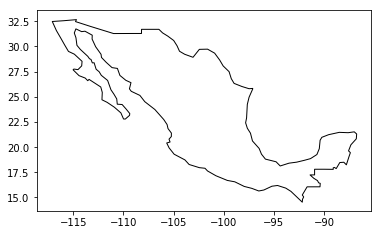

In [305]:
base = mex.plot(color='white', edgecolor='black')

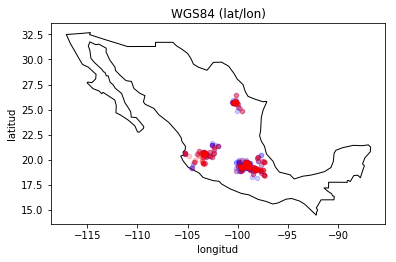

In [306]:
base = mex.plot(color='white', edgecolor='black')
base.set_title("WGS84 (lat/lon)")


zm_e.plot(ax=base,  y='Latitud',x='Longitud',kind='scatter', color='blue', alpha=.2)
zm_c.plot(ax=base,  y='latitud',x='longitud',kind='scatter', color='red', alpha=.2)

scale = 400

#### Comparando cadenas...

In [307]:
## COPEL

CC=zm_c.groupby(['cve_ent','entidad'] ).count()
CCDF=pd.DataFrame(CC[['id']])

CCDF


,,id
cve_ent,entidad,
9,DISTRITO FEDERAL,66
14,JALISCO,109
15,MÉXICO,154
19,NUEVO LEÓN,55
21,PUEBLA,61


In [308]:
## ELEKTRA
CE=zm_e.groupby(['cve_entidad','Entidad federativa'] ).count()
CEDF=pd.DataFrame(CE[['ID']])


In [309]:
CCDF=CCDF.reset_index()
CEDF=CEDF.reset_index()



In [310]:
CCDF

,cve_ent,entidad,id
0,9,DISTRITO FEDERAL,66
1,14,JALISCO,109
2,15,MÉXICO,154
3,19,NUEVO LEÓN,55
4,21,PUEBLA,61


In [311]:
CEDF

,cve_entidad,Entidad federativa,ID
0,9,CIUDAD DE MÉXICO,114
1,14,JALISCO,90
2,15,MÉXICO,205
3,19,NUEVO LEÓN,43
4,21,PUEBLA,58


In [312]:
#pd.merge( CEDF ,  CCDF ,  how = 'inner' ,  on = [ 'cve_entidad' ,  'cve_ent' ])

TABLA=pd.concat([ CCDF[['entidad','id']], CEDF[['ID']] ] , axis=1)

TABLA

,entidad,id,ID
0,DISTRITO FEDERAL,66,114
1,JALISCO,109,90
2,MÉXICO,154,205
3,NUEVO LEÓN,55,43
4,PUEBLA,61,58


In [313]:
TABLA=TABLA.rename( columns={'id':'Coppel'})
TABLA=TABLA.rename( columns={'ID':'Elektra'})


In [314]:
TABLA['Indice']= TABLA['Coppel']/TABLA['Elektra']

In [317]:
TABLA['Indice2'] = 1/TABLA['Indice']
TABLA

,entidad,Coppel,Elektra,Indice,Indice2
0,DISTRITO FEDERAL,66,114,0.578947,1.727273
1,JALISCO,109,90,1.211111,0.825688
2,MÉXICO,154,205,0.751220,1.331169
3,NUEVO LEÓN,55,43,1.279070,0.781818
4,PUEBLA,61,58,1.051724,0.950820


Se puede concluir en el estudio anterior que, para los estados de Jalisco y Nuevo León la presencia de tiendas Coppel tiene mayor presencia en 21% y 27% respectivamente más que la cadena Elektra, mientras que en la CDMX y en el Estado de México la presencia se invierte y es de 72% y 78% respectivamente más que la cadena Coppel. Para la Ciudad de Puebla, la diferencia es prácticamente insignificante, siendo apenas del 5% mayor para Puebla.